# Data wrangling Project

## Table of Contents

Introduction

Gathering data

Data assessing i.e Quality and Tidiness issues

Data cleaning

Storing data.

Data Visualization

Conclusions


## Introduction

Real-world data rarely comes clean. In this project, I'll gather data from various sources , assess its quality and tidiness issues, then clean it. The dataset to be assessed and cleaned  is the tweet archive of Twitter user @dog_rates.

## Gathering Data

### Import the necessary packages for the project

In [692]:
import requests
import pandas as pd
import numpy as np
import tweepy
import json
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [591]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [592]:
twitter_archive.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1514,691090071332753408,NaN,NaN,2016-01-24 02:48:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's a dog in a mailbox. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691090071...,12,10,None,None,None,None,None


### Download the image predictions file using the request library

In [15]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [29]:
with open('image-predictions.tsv',mode = 'wb') as file:
    file.write(response.content)
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

### Read tweets using the twitter API

In [17]:
import tweepy

Api_key = 'xxxxxxxxxxxxx'
Api_key_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
Bearer_Token = 'yyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy'
Access_token = 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz'
Access_token_secret = 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz'
    
from tweepy.auth import OAuthHandler
auth = OAuthHandler(Api_key, Api_key_secret)
auth.set_access_token(Access_token, Access_token_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)
# wait_on_rate_limit_notify=True)
# Read tweets via Twitter API

with open('tweet_json.txt', 'w') as file:
    for tweet in df['tweet_id']:
        try:
            tweets = api.get_status(tweet, tweet_mode = 'extended')
            json.dump( tweets._json, file)
            file.write('\n')
            print(tweet)
        except Exception as e: 
            print('Error with tweet ' + str(tweet) + ': ' + str(e))

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
Error with tweet 888202515573088257: 404 Not Found
144 - No status found with that ID.
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
Error with tweet 883482846933004288: Failed to send request: ('Connection abo

833732339549220864
833722901757046785
833479644947025920
Error with tweet 833124694597443584: Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Error with tweet 832998151111966721: Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Error with tweet 832769181346996225: Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
832757312314028032
832682457690300417
832645525019123713
832636094638288896
832397543355072512
832369877331693569
832273440279240704
832215909146226688
832215726631055365
832088576586297345
832040443403784192
832032802820481025
831939777352105988
831926988323639298
831911600680497154
831670449226514432
831650051525054464
831552930092285952
8313227

783821107061198850
783695101801398276
783466772167098368
783391753726550016
783347506784731136
783334639985389568
783085703974514689
782969140009107456
782747134529531904
782722598790725632
782598640137187329
782305867769217024
782021823840026624
781955203444699136
781661882474196992
781655249211752448
781524693396357120
781308096455073793
781251288990355457
781163403222056960
780931614150983680
780858289093574656
780800785462489090
780601303617732608
780543529827336192
780496263422808064
780476555013349377
780459368902959104
780192070812196864
780092040432480260
780074436359819264
779834332596887552
779377524342161408
779124354206535695
Error with tweet 779123168116150273: 404 Not Found
144 - No status found with that ID.
779056095788752897
Error with tweet 778990705243029504: Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Error with tweet 778774459159379968: Failed to sen

750011400160841729
749996283729883136
749981277374128128
749774190421639168
749417653287129088
749403093750648834
749395845976588288
749317047558017024
749075273010798592
749064354620928000
749036806121881602
748977405889503236
748932637671223296
748705597323898880
748699167502000129
748692773788876800
748575535303884801
748568946752774144
748346686624440324
748337862848962560
748324050481647620
748307329658011649
748220828303695873
747963614829678593
747933425676525569
747885874273214464
747844099428986880
747816857231626240
747651430853525504
747648653817413632
747600769478692864
747594051852075008
747512671126323200
747461612269887489
747439450712596480
747242308580548608
747219827526344708
747204161125646336
747103485104099331
746906459439529985
746872823977771008
746818907684614144
746790600704425984
746757706116112384
746726898085036033
746542875601690625
746521445350707200
746507379341139972
746369468511756288
746131877086527488
746056683365994496
745789745784041472
745712589599

703041949650034688
702932127499816960
702899151802126337
702684942141153280
702671118226825216
702598099714314240
702539513671897089
702332542343577600
702321140488925184
702276748847800320
702217446468493312
701981390485725185
701952816642965504
701889187134500865


Rate limit reached. Sleeping for: 117


Error with tweet 701805642395348998: Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)
701601587219795968
701570477911896070
701545186879471618
701214700881756160
700890391244103680
700864154249383937
700847567345688576
700796979434098688
700747788515020802
700518061187723268
700505138482569216
700462010979500032
700167517596164096
700151421916807169
700143752053182464
700062718104104960
700029284593901568
700002074055016451
699801817392291840
699788877217865730
699779630832685056
699775878809702401
699691744225525762
699446877801091073
699434518667751424
699423671849451520
699413908797464576
699370870310113280
699323444782047232
699088579889332224
699079609774645248
699072405256409088
699060279947165696
699036661657767936
698989035503689728
698953797952008193
698907974262222848
698710712454139905
698703483621523456
698635131305795584
698549713696649216
698355670425473025
698342080612007937
698262614669991936
69819540921955

Error with tweet 681231109724700672: Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Error with tweet 681193455364796417: Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
680970795137544192
680959110691590145
Error with tweet 680940246314430465: Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
680934982542561280
Error with tweet 680913438424612864: Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
680889648562991104
680836378243002368
Error with tweet 680805554198020098: Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 

Error with tweet 677557565589463040: Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
677547928504967168
677530072887205888
677335745548390400
677334615166730240
677331501395156992
677328882937298944
677314812125323265
677301033169788928
677269281705472000
677228873407442944
677187300187611136
676975532580409345
676957860086095872
676949632774234114
676948236477857792
676946864479084545
676942428000112642
676936541936185344
676916996760600576
676897532954456065
676864501615042560
676821958043033607
676819651066732545
676811746707918848
676776431406465024
676617503762681856
676613908052996102
676606785097199616
676603393314578432
676593408224403456
676590572941893632
676588346097852417
676582956622721024
676575501977128964
676533798876651520
676496375194980353
676470639084101634
676440007570247681
Error with tweet 676430933382295552: Failed to send request: ('Connection aborte

670465786746662913
670452855871037440
670449342516494336
670444955656130560
670442337873600512
670435821946826752
670434127938719744
670433248821026816
670428280563085312
670427002554466305
670421925039075328
670420569653809152
670417414769758208
670411370698022913
670408998013820928
670403879788544000
Error with tweet 670385711116361728: Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Error with tweet 670374371102445568: Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Error with tweet 670361874861563904: Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
670338931251150849
670319130621435904
670303360680108032
670290420111441920
670093938074779648
6700864

Rate limit reached. Sleeping for: 97


666020888022790149


Transform the tweet_json.txt file into a pandas dataframe

In [30]:
tweet_json_list = []
import glob
import json
glob.glob('tweet_json.txt')
with open('tweet_json.txt', encoding = 'utf-8') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet["id"]
        fav_count = tweet["favorite_count"]
        retweets = tweet["retweet_count"]
        language = tweet["lang"]
        about = tweet["full_text"]
        
        tweet_json_list.append({'tweet_id': str(tweet_id),
                               'favorite_count': int(fav_count),
                               'retweets_count': int(retweets),
                                'full_text' : str(about),
                                'lang': str(language)
                               })
tweet_json = pd.DataFrame(tweet_json_list, columns = ['tweet_id','favorite_count',
                                                   'retweets_count','full_text',
                                                   'lang']
                       )
tweet_json.sample()

,tweet_id,favorite_count,retweets_count,full_text,lang
897,752917284578922496,6491,1437,This is Grizzie. She's a semi-submerged Bahrai...,en


## Accessing Data

In [126]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"href=""http://twitter.com/download/iphone""",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"href=""http://twitter.com/download/iphone""",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"href=""http://twitter.com/download/iphone""",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"href=""http://twitter.com/download/iphone""",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"href=""http://twitter.com/download/iphone""",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"href=""http://twitter.com/download/iphone""",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"href=""http://twitter.com/download/iphone""",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"href=""http://twitter.com/download/iphone""",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"href=""http://twitter.com/download/iphone""",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [106]:
sum(twitter_archive['name'].duplicated())

1399

In [90]:
twitter_archive['rating_numerator'].sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,750041628174217216,NaN,NaN,2016-07-04 19:00:33 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Beau. He's trying to keep his daddy fr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750041628...,13,10,Beau,None,None,None,None
976,750026558547456000,NaN,NaN,2016-07-04 18:00:41 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,None,None,None,None
977,750011400160841729,NaN,NaN,2016-07-04 17:00:26 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Piper. She's an airport doggo. Please ret...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750011400...,11,10,Piper,doggo,None,None,None
978,749996283729883136,NaN,NaN,2016-07-04 16:00:22 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Bo. He emanates happiness. 12/10 I cou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749996283...,12,10,Bo,None,None,None,None


In [22]:
sum(twitter_archive.in_reply_to_status_id.isnull())

2278

In [38]:
sum(twitter_archive.duplicated())

0

In [70]:
twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [71]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [75]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [78]:
twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [41]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [72]:
type(twitter_archive['retweeted_status_timestamp'])

pandas.core.series.Series

In [73]:
twitter_archive['retweeted_status_timestamp'].value_counts()

2017-07-19 00:47:34 +0000    1
2015-11-28 03:31:48 +0000    1
2015-11-19 03:29:07 +0000    1
2015-11-16 04:02:55 +0000    1
2016-09-02 18:03:10 +0000    1
                            ..
2016-11-06 01:33:58 +0000    1
2016-10-06 15:49:14 +0000    1
2017-01-20 00:50:15 +0000    1
2017-01-20 17:00:46 +0000    1
2015-11-20 03:41:59 +0000    1
Name: retweeted_status_timestamp, Length: 181, dtype: int64

In [66]:
twitter_archive['timestamp'].dtypes

dtype('O')

In [59]:
twitter_archive.source

0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
                              ...                        
2351    <a href="http://twitter.com/download/iphone" r...
2352    <a href="http://twitter.com/download/iphone" r...
2353    <a href="http://twitter.com/download/iphone" r...
2354    <a href="http://twitter.com/download/iphone" r...
2355    <a href="http://twitter.com/download/iphone" r...
Name: source, Length: 2356, dtype: object

In [39]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [107]:
image_predictions['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [81]:
sum(image_predictions.duplicated())

0

In [89]:
image_predictions.p1_conf.sort_values()

38      0.044333
136     0.055379
1093    0.059033
1370    0.063152
246     0.070076
          ...   
1372    0.999953
149     0.999956
1229    0.999962
1299    0.999984
106     1.000000
Name: p1_conf, Length: 2075, dtype: float64

In [86]:
image_predictions.p2_conf.sort_values()

106     1.011300e-08
1299    1.002880e-05
1229    1.448950e-05
230     1.763430e-05
1372    2.335910e-05
            ...     
72      4.549370e-01
232     4.605650e-01
1514    4.648160e-01
1756    4.676780e-01
986     4.880140e-01
Name: p2_conf, Length: 2075, dtype: float64

In [87]:
image_predictions.p3_conf.sort_values()

106     1.740170e-10
149     2.160900e-07
1906    5.595040e-07
1760    8.832830e-07
1299    1.434470e-06
            ...     
1613    2.476190e-01
123     2.551820e-01
97      2.706730e-01
1080    2.710420e-01
1071    2.734190e-01
Name: p3_conf, Length: 2075, dtype: float64

In [79]:
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [54]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [55]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [40]:
tweet_json

,tweet_id,favorite_count,retweets_count,full_text,lang
0,892420643555336193,33695,6969,This is Phineas. He's a mystical boy. Only eve...,en
1,892177421306343426,29218,5272,This is Tilly. She's just checking pup on you....,en
2,891815181378084864,21973,3464,This is Archie. He is a rare Norwegian Pouncin...,en
3,891689557279858688,36781,7191,This is Darla. She commenced a snooze mid meal...,en
4,891327558926688256,35180,7715,This is Franklin. He would like you to stop ca...,en
...,...,...,...,...,...
2216,666049248165822465,88,36,Here we have a 1949 1st generation vulpix. Enj...,en
2217,666044226329800704,246,115,This is a purebred Piers Morgan. Loves to Netf...,en
2218,666033412701032449,100,36,Here is a very happy pup. Big fan of well-main...,en
2219,666029285002620928,112,39,This is a western brown Mitsubishi terrier. Up...,en


In [56]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221 entries, 0 to 2220
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2221 non-null   object
 1   favorite_count  2221 non-null   int64 
 2   retweets_count  2221 non-null   int64 
 3   full_text       2221 non-null   object
 4   lang            2221 non-null   object
dtypes: int64(2), object(3)
memory usage: 86.9+ KB


In [58]:
sum(tweet_json.duplicated())

0

In [110]:
all_columns = pd.Series(list(twitter_archive) + list(image_predictions) + list(tweet_json))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

### Quality Issues

####  tweet_archive dataframe 


1. Image tag(a href) in the source column in twitter archive dataframe.


2. The extra characters (r...) at the end of source column.


3. The extra zeros(+0000) in timestamp column.


4. Convert timestamp and date into DateTime datatype.


5. The rating_denominator should always be 10.


6. +0000 in retweeted_status_timestamp column values.


7. retweeted_status_timestamp should be a datetime object.


8. None values in the following columns:name,doggo, floofer, pupper and puppo columns.



#### image_predictions dataframe

1. p1_conf is not expressed as a percentage in image predictions dataframe.


2. p2_conf is not expressed as a percentage in image predictions dataframe.


3. p3_conf is not expressed as a percentage in image predictions dataframe

#### Tweet_json dataframe

1. Erroneous datatype for tweet_id in tweet_json dataframe.


## Tidiness Issues

1. Create one column for dog age stages because a dog cannot exist in different age stages at the same time.


2. Separate the timestamp into 2 columns(date and time) for easy analysis of individual factors.

## Cleaning

### Make a copy of oroginal datasets.

In [ ]:
twitter_archive_copy1 = twitter_archive.copy()
image_predictions_copy1 = image_predictions.copy()
tweet_json = tweet_json.copy()

#### Define

Image tag(a href) in the source column in twitter archive dataframe.

The extra characters (r...) at the end of source column.

#### Code


In [593]:
 twitter_archive['source'] = twitter_archive['source'].apply(lambda x: x.split(' ')[1])

#### Test

In [594]:
twitter_archive['source']

0       href="http://twitter.com/download/iphone"
1       href="http://twitter.com/download/iphone"
2       href="http://twitter.com/download/iphone"
3       href="http://twitter.com/download/iphone"
4       href="http://twitter.com/download/iphone"
                          ...                    
2351    href="http://twitter.com/download/iphone"
2352    href="http://twitter.com/download/iphone"
2353    href="http://twitter.com/download/iphone"
2354    href="http://twitter.com/download/iphone"
2355    href="http://twitter.com/download/iphone"
Name: source, Length: 2356, dtype: object

#### Define

The extra zeros(+0000) in timestamp column.

#### Code

In [595]:
twitter_archive['timestamp'] = twitter_archive['timestamp'].apply(lambda x: x.split(' +')[0])

#### Test

In [596]:
twitter_archive['timestamp']

0       2017-08-01 16:23:56
1       2017-08-01 00:17:27
2       2017-07-31 00:18:03
3       2017-07-30 15:58:51
4       2017-07-29 16:00:24
               ...         
2351    2015-11-16 00:24:50
2352    2015-11-16 00:04:52
2353    2015-11-15 23:21:54
2354    2015-11-15 23:05:30
2355    2015-11-15 22:32:08
Name: timestamp, Length: 2356, dtype: object

#### Define

Separate the timestamp into 2 columns(date and time) for easy analysis of individual factors.

#### Code

In [597]:
twitter_archive['date'] = twitter_archive['timestamp'].apply(lambda x: x.split(' ')[0])

twitter_archive['timestamp'] = twitter_archive['timestamp'].apply(lambda x: x.split(' ')[1])

#### Test

In [598]:
twitter_archive.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date
292,838083903487373313,NaN,NaN,17:49:08,"href=""http://twitter.com/download/iphone""",This is Daisy. She's puppears to be rare as al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/838083903...,13,10,Daisy,None,None,None,None,2017-03-04


#### Define

Convert timestamp and date into DateTime datatype.

#### Code

In [599]:
twitter_archive['timestamp'].apply(lambda x:x.strip())

twitter_archive['date'] = pd.to_datetime(twitter_archive['date'])
twitter_archive['timestamp'] = pd.to_datetime(twitter_archive['timestamp'], format = '%H:%M:%S')

#### Test

In [600]:
twitter_archive['timestamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype         
--------------  -----         
2356 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 18.5 KB


In [601]:
twitter_archive['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: date
Non-Null Count  Dtype         
--------------  -----         
2356 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 18.5 KB


#### Define 

The rating_denominator should always be 10.

#### Code

In [602]:
twitter_archive['rating_denominator'] = 10

#### Test

In [603]:
twitter_archive['rating_denominator'].value_counts()

10    2356
Name: rating_denominator, dtype: int64

#### Define

Remove '+0000' in retweeted_status_timestamp column values.

#### Code

In [604]:
# First convert it into a string datatype to enable splitting. 
twitter_archive['retweeted_status_timestamp'] = twitter_archive['retweeted_status_timestamp'].astype(str)

# split the last part
twitter_archive['retweeted_status_timestamp'] = twitter_archive['retweeted_status_timestamp'].apply(lambda x: x.split(' +')[0])

#### Test

In [605]:
twitter_archive['retweeted_status_timestamp'].value_counts()

nan                    2175
2015-12-02 03:40:57       1
2015-11-20 01:06:48       1
2015-11-19 03:29:07       1
2015-11-16 04:02:55       1
                       ... 
2017-01-27 17:04:02       1
2016-11-06 01:33:58       1
2016-10-06 15:49:14       1
2017-01-20 00:50:15       1
2015-11-20 03:41:59       1
Name: retweeted_status_timestamp, Length: 182, dtype: int64

#### Define

retweeted_status_timestamp should be a datetime object.

#### Code

In [606]:
twitter_archive['retweeted_status_timestamp'] = pd.to_datetime(twitter_archive['retweeted_status_timestamp'], format = '%Y-%m-%d %H:%M:%S')

#### Test

In [607]:
twitter_archive['retweeted_status_timestamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: retweeted_status_timestamp
Non-Null Count  Dtype         
--------------  -----         
181 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 18.5 KB


#### Define

Replacing None values in the following columns:name, doggo, floofer, pupper and puppo columns.

#### Code

In [608]:
stages = ['name','doggo','floofer','pupper','puppo']
for stage in stages:
    twitter_archive[stage] = twitter_archive[stage].replace('None', np.NaN)

#### Test

In [609]:
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date
0,892420643555336193,NaN,NaN,1900-01-01 16:23:56,"href=""http://twitter.com/download/iphone""",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,2017-08-01
1,892177421306343426,NaN,NaN,1900-01-01 00:17:27,"href=""http://twitter.com/download/iphone""",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,2017-08-01
2,891815181378084864,NaN,NaN,1900-01-01 00:18:03,"href=""http://twitter.com/download/iphone""",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,2017-07-31


#### Define

p1_conf,p2_conf and p3_conf are not expressed as a percentage in image predictions dataframe.

#### Code

In [610]:
p_conf = ['p1_conf','p2_conf','p3_conf']

for p_con in p_conf:
    image_predictions[p_con] = image_predictions[p_con].apply(lambda x: x*100)

#### Test

In [611]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,5.557120e+09,True,English_springer,2.257700e+09,True,German_short-haired_pointer,1.752190e+09,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,1.702780e+09,False,Labrador_retriever,1.680860e+09,True,spatula,4.083590e+08,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,7.160120e+09,True,malamute,7.825300e+08,True,kelpie,3.137890e+08,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,3.235810e+09,True,Pekinese,9.064650e+08,True,papillon,6.895690e+08,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,9.704860e+08,False,bagel,8.585110e+08,False,banana,7.611000e+08,False


#### Define

Create one column for dog age stages because a dog cannot exist in different age stages at the same time.

Delete the doggo,floofer,pupper and puppo columns after creating the age_stage columns.

#### Code

In [612]:
twitter_archive['age_stage'] = np.nan

stages = ['doggo','floofer','pupper','puppo']
for stage in stages:
    for x in range(0,2355):
        if twitter_archive[stage][x] == 'doggo':
            twitter_archive['age_stage'][x] = 'doggo'
        if twitter_archive[stage][x] == 'floofer':
            twitter_archive['age_stage'][x] = 'floofer'
        if twitter_archive[stage][x] == 'pupper':
            twitter_archive['age_stage'][x] = 'pupper'
        if twitter_archive[stage][x] == 'puppo':
            twitter_archive['age_stage'][x] = 'puppo'
    
# Delete 'doggo','floofer','pupper','puppo' columns 
    twitter_archive.drop(stage, inplace = True, axis= 1)   

C:\Users\USER\AppData\Local\Temp\ipykernel_9348\2589655283.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive['age_stage'][x] = 'doggo'
C:\Users\USER\AppData\Local\Temp\ipykernel_9348\2589655283.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive['age_stage'][x] = 'floofer'
C:\Users\USER\AppData\Local\Temp\ipykernel_9348\2589655283.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive['ag

#### Testing

In [632]:
twitter_archive['age_stage'].value_counts()

pupper     257
doggo       83
puppo       30
floofer     10
Name: age_stage, dtype: int64

In [633]:
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,date,age_stage
0,892420643555336193,NaN,NaN,1900-01-01 16:23:56,"href=""http://twitter.com/download/iphone""",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,NaN
1,892177421306343426,NaN,NaN,1900-01-01 00:17:27,"href=""http://twitter.com/download/iphone""",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017-08-01,NaN


#### Define

Erroneous datatype for tweet_id in tweet_json dataframe.

#### Code

In [669]:
tweet_json['tweet_id'] = pd.to_numeric(tweet_json['tweet_id'],errors = 'ignore', downcast = 'integer')

#### Testing

In [670]:
tweet_json['tweet_id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2221 entries, 0 to 2220
Series name: tweet_id
Non-Null Count  Dtype
--------------  -----
2221 non-null   int64
dtypes: int64(1)
memory usage: 17.5 KB


### Merge all the dataframes into a master dataset

In [637]:
weratedogs = pd.merge(twitter_archive, image_predictions, on="tweet_id")

In [642]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221 entries, 0 to 2220
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2221 non-null   object
 1   favorite_count  2221 non-null   int64 
 2   retweets_count  2221 non-null   int64 
 3   full_text       2221 non-null   object
 4   lang            2221 non-null   object
dtypes: int64(2), object(3)
memory usage: 86.9+ KB


In [671]:
weratedogs_masterdf = pd.merge(weratedogs, tweet_json, on="tweet_id")

In [674]:
weratedogs_masterdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 1961
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1962 non-null   int64         
 1   in_reply_to_status_id       23 non-null     float64       
 2   in_reply_to_user_id         23 non-null     float64       
 3   timestamp                   1962 non-null   datetime64[ns]
 4   source                      1962 non-null   object        
 5   text                        1962 non-null   object        
 6   retweeted_status_id         68 non-null     float64       
 7   retweeted_status_user_id    68 non-null     float64       
 8   retweeted_status_timestamp  68 non-null     datetime64[ns]
 9   expanded_urls               1962 non-null   object        
 10  rating_numerator            1962 non-null   int64         
 11  rating_denominator          1962 non-null   int64       

#### store the master dataframe

In [706]:
weratedogs_masterdf.to_csv('twitter_archive_master.csv', index = False)

## Data Insight and Visualization

#### Data Insight

In [679]:
weratedogs_masterdf['favorite_count'].describe()

count      1962.000000
mean       7562.203874
std       11391.111653
min           0.000000
25%        1428.250000
50%        3339.500000
75%        9411.000000
max      144235.000000
Name: favorite_count, dtype: float64

In [678]:
weratedogs_masterdf['retweets_count'].describe()

count     1962.000000
mean      2400.277778
std       4186.928126
min         11.000000
25%        512.000000
50%       1136.000000
75%       2754.750000
max      70326.000000
Name: retweets_count, dtype: float64

In [680]:
weratedogs_masterdf['favorite_count'].mean() > weratedogs_masterdf['retweets_count'].mean()

True

#### Conclusion

Users were more likely to 'like' a tweet compared to giving it a 'retweet'.

In [682]:
weratedogs_masterdf['p1_conf'].describe()

count    1.962000e+03
mean     5.920290e+09
std      2.704383e+09
min      4.433340e+08
25%      3.634778e+09
50%      5.869370e+09
75%      8.409685e+09
max      1.000000e+10
Name: p1_conf, dtype: float64

In [683]:
weratedogs_masterdf['p2_conf'].describe()

count    1.962000e+03
mean     1.353249e+09
std      1.004997e+09
min      1.011300e+02
25%      5.453780e+08
50%      1.192560e+09
75%      1.964605e+09
max      4.880140e+09
Name: p2_conf, dtype: float64

In [684]:
weratedogs_masterdf['p3_conf'].describe()

count    1.962000e+03
mean     6.062769e+08
std      5.083169e+08
min      1.740170e+00
25%      1.660007e+08
50%      4.990720e+08
75%      9.241082e+08
max      2.734190e+09
Name: p3_conf, dtype: float64

#### Conclusion

The system had most confidence in predicting the last image and the least confidence in predicting the second image.

In [690]:
weratedogs_masterdf['rating_numerator'].max()

1776

#### Conclusion

The highest rating given to a dog was 1776.

### Data Visualization

Text(0, 0.5, 'Rating_numerator')

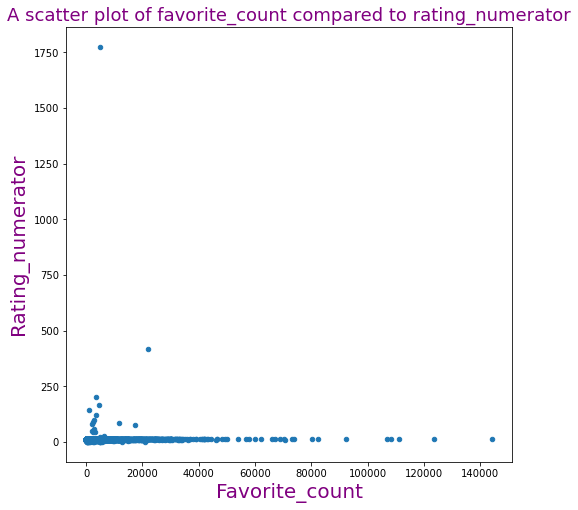

In [705]:
weratedogs_masterdf.plot(kind='scatter',y='rating_numerator',x='favorite_count',figsize=(8,8))
plt.title('A scatter plot of favorite_count compared to rating_numerator',fontsize=18,color='purple')
plt.xlabel('Favorite_count',fontsize=20,color='purple')
plt.ylabel('Rating_numerator',fontsize=20,color='purple')

#### Conclusion

Tweets which were rated highly did not necessarily have more 'likes'. 